In [18]:
import pandas as pd

import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.io as pio

from plotly.subplots import make_subplots

import plotly.express as px


import os

In [19]:
file_path=r'D:\PythonDev\MyQuantFinProject\Data\SPY-60Bars07Sep-Now.csv'
root_report_path='D:\PythonDev\MyQuantFinProject\Data\Report'

In [20]:
symbol=(os.path.split(file_path)[1]).split('-')[0]
print(symbol)
#symbol="ETH"

folder_report = os.path.splitext((os.path.split(file_path)[1]))[0]
print(file_path)
print(folder_report)

report_path=os.path.join(root_report_path,folder_report)
print(report_path)

SPY
D:\PythonDev\MyQuantFinProject\Data\SPY-60Bars07Sep-Now.csv
SPY-60Bars07Sep-Now
D:\PythonDev\MyQuantFinProject\Data\Report\SPY-60Bars07Sep-Now


In [21]:
range_df=pd.read_csv(file_path,index_col='Date/Time',parse_dates=['Date/Time'],dayfirst=True)
range_df.info()
range_df.drop(columns='Ticker',inplace=True)

list_cols=list(range_df.columns)


#Cut only interval looking
fromDate='';
toDate='';

if fromDate!='' and toDate!='':
 df=range_df[fromDate:toDate]
else:
 df=range_df


df.head(5)
#df.tail()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2022-09-07 to 2022-11-30
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ticker        60 non-null     object 
 1   _XHH25        60 non-null     float64
 2   _XLL25        60 non-null     float64
 3   _XMid25       60 non-null     float64
 4   Range25       60 non-null     float64
 5   _PctX_HtoL25  60 non-null     float64
 6   _PctX_LtoH25  60 non-null     float64
 7   _PctMidToH25  60 non-null     float64
 8   _PctMidToL25  60 non-null     float64
 9   Close         60 non-null     float64
 10  Volume        60 non-null     float64
dtypes: float64(10), object(1)
memory usage: 5.6+ KB


,_XHH25,_XLL25,_XMid25,Range25,_PctX_HtoL25,_PctX_LtoH25,_PctMidToH25,_PctMidToL25,Close,Volume
Date/Time,,,,,,,,,,
2022-09-07,429.7,390.76,410.23,38.94,-9.06,9.97,4.75,-4.75,397.78,70964200.0
2022-09-08,429.7,390.76,410.23,38.94,-9.06,9.97,4.75,-4.75,400.38,80821696.0
2022-09-09,429.7,390.76,410.23,38.94,-9.06,9.97,4.75,-4.75,406.60,76618096.0
2022-09-12,429.7,390.76,410.23,38.94,-9.06,9.97,4.75,-4.75,410.97,69256304.0
2022-09-13,429.7,390.76,410.23,38.94,-9.06,9.97,4.75,-4.75,393.10,122947104.0


In [22]:
# create directory

try:  
 if not os.path.exists(report_path):
     os.mkdir(report_path) 
     print(report_path)   
     
except OSError as error:  
    raise error

D:\PythonDev\MyQuantFinProject\Data\Report\SPY-60Bars07Sep-Now


# Plot scatter to view relation between difference range

In [23]:
print(list_cols)

['_XHH25', '_XLL25', '_XMid25', 'Range25', '_PctX_HtoL25', '_PctX_LtoH25', '_PctMidToH25', '_PctMidToL25', 'Close', 'Volume']


In [24]:

#https://plotly.com/python/figure-factory-table/
def plot_dynamic_scatter(listColsToPlot,dfTable,title,y_title):
    #fig=go.Figure()
    fig =  ff.create_table(dfTable,height_constant=60) 
    
    for col_name in listColsToPlot:
     fig.add_trace (
        go.Scatter(x=df.index, y=df[col_name],
                   name=col_name,opacity=0.8,
                   xaxis='x2', yaxis='y2')
     )
    fig.update_layout(
    title_text = title,
    height = 800,
    margin = {'t':75, 'l':50},
    yaxis = {'domain': [0, .45]},
    xaxis2 = {'anchor': 'y2'},
    yaxis2 = {'domain': [.6, 1], 'anchor': 'x2', 'title':y_title}
    )
      
    return fig
def  manage_chart(dfx,colsToPlot,title,y_title):
    print(colsToPlot)
    dfTable=((dfx[colsToPlot]).reset_index()).tail(10)
    dfTable['Date/Time']=dfTable['Date/Time'].dt.strftime('%d-%b-%Y')
    dfTable=dfTable.rename(columns={'Date/Time':'Date'})
    #print(dfTable.info())
    fig_hml=None
    if len(colsToPlot)>0:
      fig_hml=plot_dynamic_scatter(colsToPlot,dfTable,title,y_title)
    return fig_hml

SPY_HH-LL
['_XHH25', '_XLL25', '_XMid25']


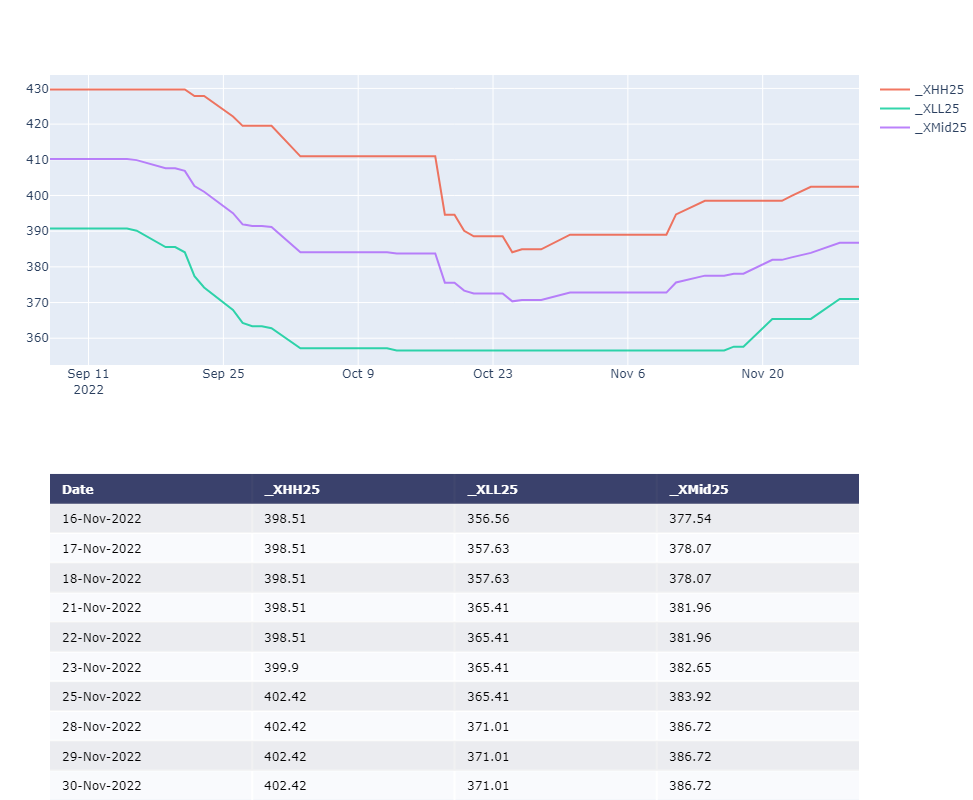

In [25]:
chartTitle1=f"{symbol}_HH-LL"
print(chartTitle1)
# colsToPlot=[  x for  x  in list_cols if x.startswith('_X') and ( x.startswith('_XMid')==False) ]
colsToPlot=[  x for  x  in list_cols if x.startswith('_X') ]
fig=manage_chart(df,colsToPlot,"",'')

pio.write_image(fig, f"{report_path}\\{chartTitle1}.png")
fig

SPY_HH-LL
['_PctX_HtoL25', '_PctX_LtoH25']


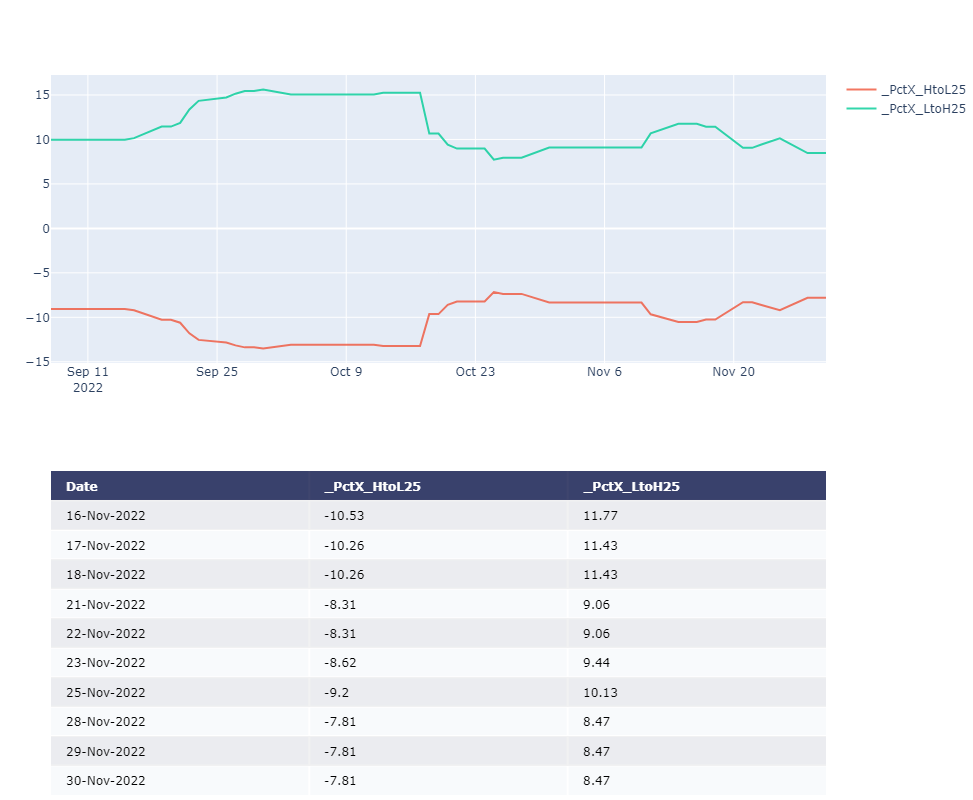

In [26]:
chartTitle2=f"{symbol}_PCT-HH-LL"
print(chartTitle1)
# colsToPlot=[  x for  x  in list_cols if x.startswith('_X') and ( x.startswith('_XMid')==False) ]
colsToPlot=[  x for  x  in list_cols if x.startswith('_PctX') ]
fig=manage_chart(df,colsToPlot,"",'')

pio.write_image(fig, f"{report_path}\\{chartTitle2}.png")
fig

SPY_HH-LL
['_PctMidToH25', '_PctMidToL25']


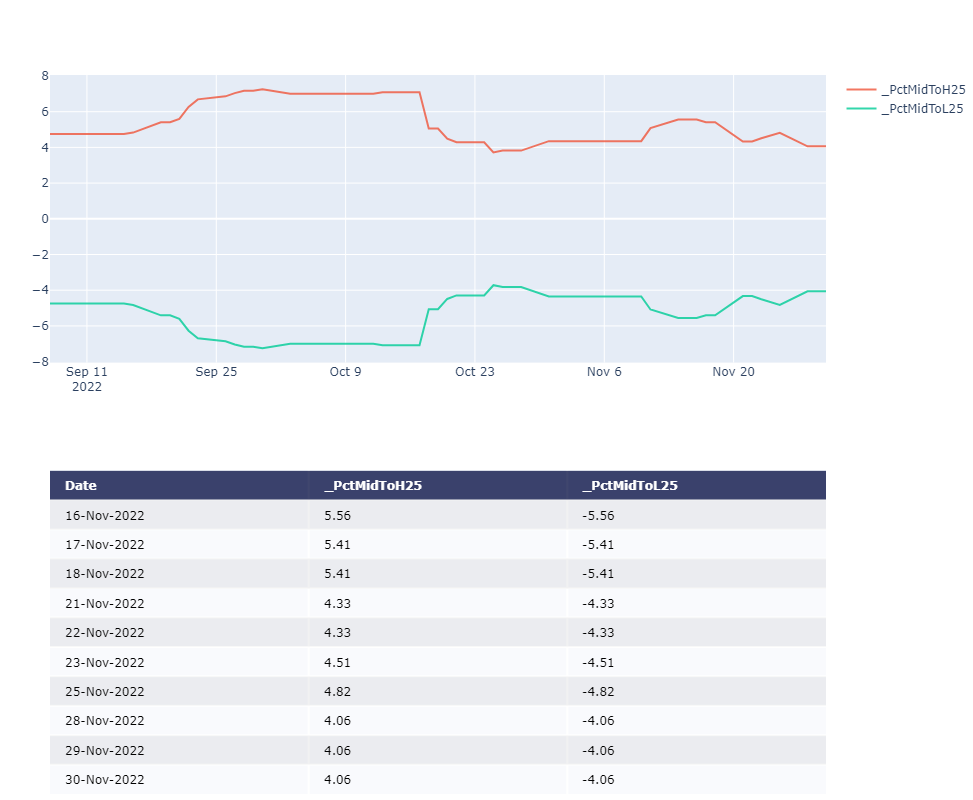

In [27]:
chartTitle3=f"{symbol}_PCT-Mid-HH"
print(chartTitle1)
# colsToPlot=[  x for  x  in list_cols if x.startswith('_X') and ( x.startswith('_XMid')==False) ]
colsToPlot=[  x for  x  in list_cols if x.startswith('_PctMidTo') ]
fig=manage_chart(df,colsToPlot,"",'')

pio.write_image(fig, f"{report_path}\\{chartTitle3}.png")
fig

In [28]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
def plot_mutiple_histrogram(df,cols_name,rows):
  fig=make_subplots(rows=len(cols_name),cols=1,)  
  for x in range(rows):
     # print(cols_name[x],"-",x+1)
     fig.add_trace(go.Histogram(x=df[cols_name[x]],name=cols_name[x]) ,row=x+1,col=1)
        
  fig.update_layout( autosize=True,width=800,height=800, paper_bgcolor="LightSteelBlue",legend_orientation="h")

  return fig

['_XHH25', '_XLL25', '_XMid25']


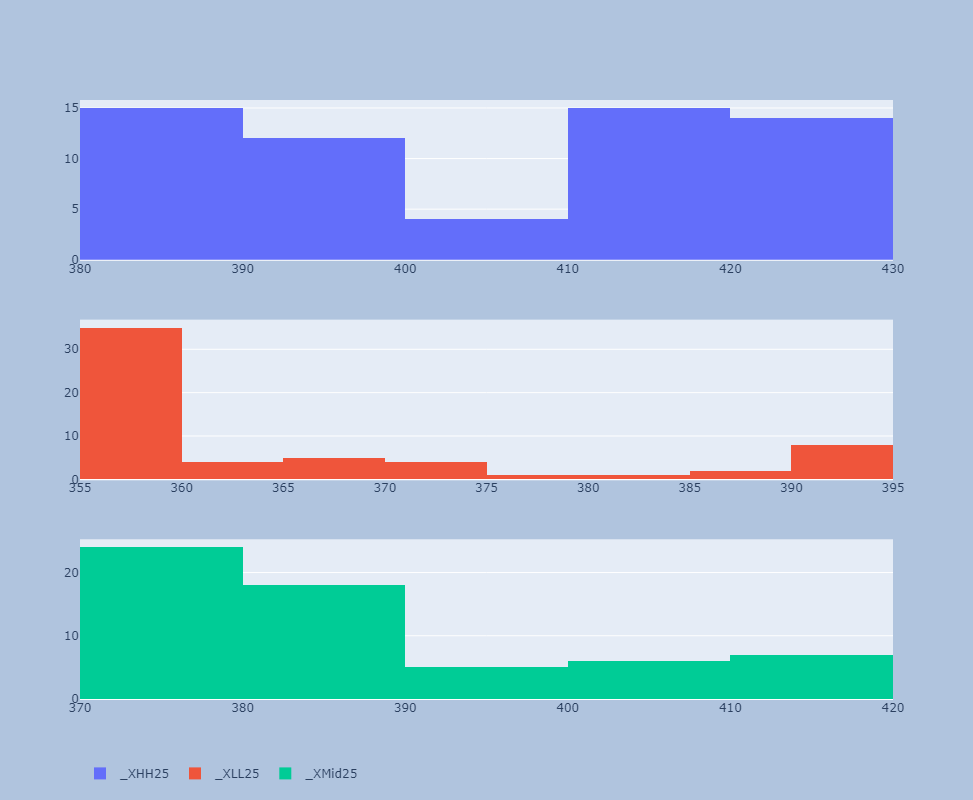

In [29]:
colsToDist_1=[  x for  x  in list_cols if x.startswith('_X') ]
print(colsToDist_1)
fig=plot_mutiple_histrogram(df,colsToDist_1,len(colsToDist_1))
pio.write_image(fig, f"{report_path}\\{symbol}_PriceDist.png")
fig

['_PctX_HtoL25', '_PctX_LtoH25']


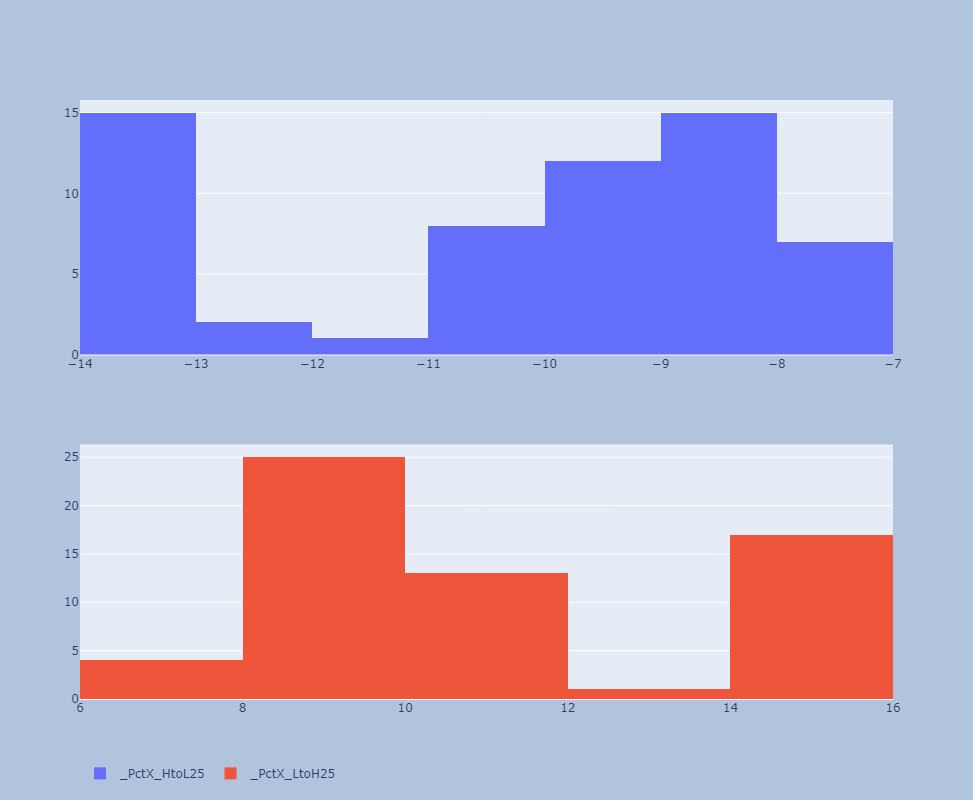

In [30]:
colsToDist_2=[  x for  x  in list_cols if x.startswith('_PctX') ]
print(colsToDist_2)
fig=plot_mutiple_histrogram(df,colsToDist_2,len(colsToDist_2))
pio.write_image(fig, f"{report_path}\\{symbol}_HL_PccDist.png")
fig

['_PctMidToH25', '_PctMidToL25']


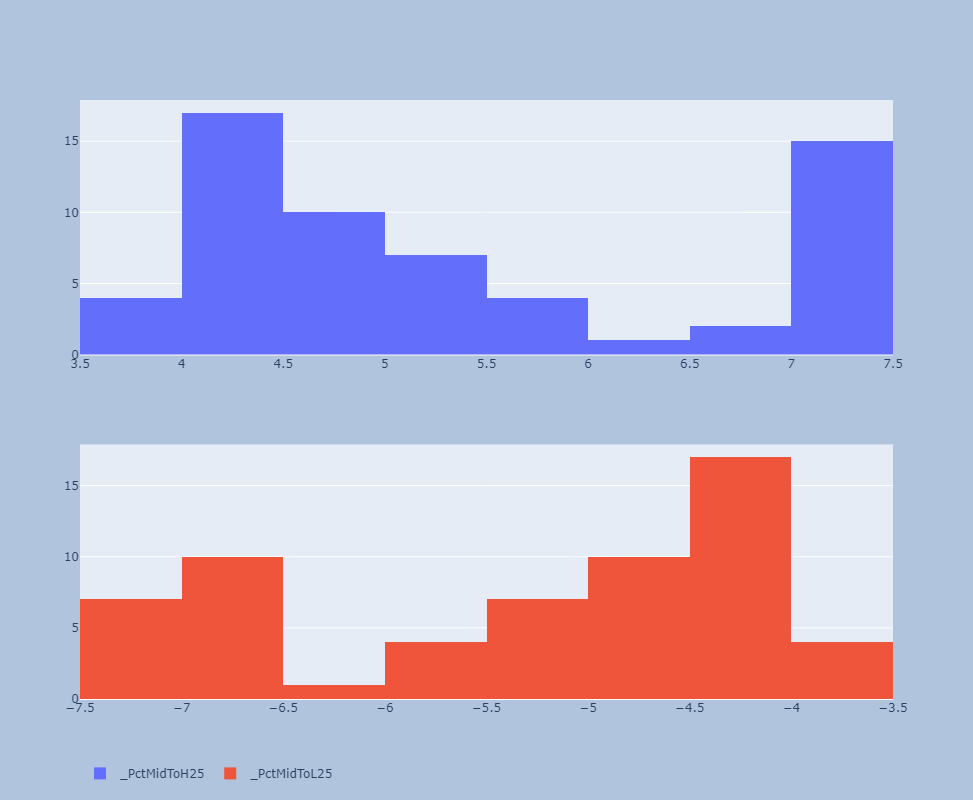

In [31]:
colsToDist_3=[  x for  x  in list_cols if x.startswith('_PctMid') ]
print(colsToDist_3)
fig=plot_mutiple_histrogram(df,colsToDist_3,len(colsToDist_3))
pio.write_image(fig, f"{report_path}\\{symbol}_Mid_PccDist.png")
fig

In [32]:
if df['Volume'].min()>=1000000:
   df['Volume']= df['Volume']/1000000
   print("Convert to Vol-M (Min Vol>1M)")

Convert to Vol-M (Min Vol>1M)


['Close', 'Volume']


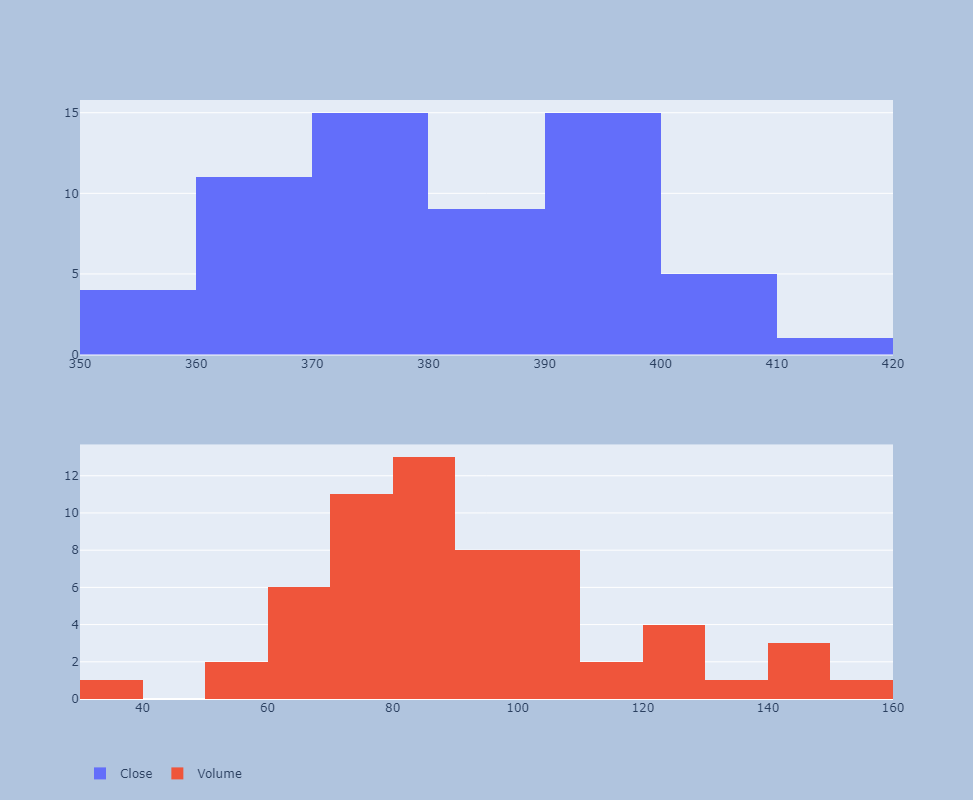

In [33]:



colsToDist_4=[ 'Close','Volume' ]
print(colsToDist_4)
fig=plot_mutiple_histrogram(df,colsToDist_4,len(colsToDist_4))
pio.write_image(fig, f"{report_path}\\{symbol}_PriceVol.png")
fig